# Introduction:
Energy efficiency has become an important feature in real estate and buildings not only from a cost point of view but also from a climate change perspective. Through an energy efficiency dataset, we shall create a simple regression model to predict energy consumption esp. heating and cooling loads of a building.

# Data Preparation:
We are going to use the Energy Efficiency Dataset (https://www.kaggle.com/datasets/elikplim/eergy-efficiency-dataset/data) for this model and then check for null values and remove them.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eergy-efficiency-dataset/ENB2012_data.csv


In [2]:
# Assigning the data to a dataframe
df = pd.read_csv(os.path.join(dirname, filename))

In [3]:
# Check the data (esp. column names)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
# Check for null values
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

<Axes: >

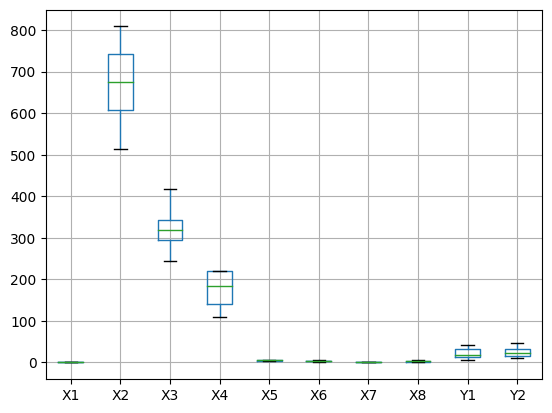

In [5]:
# No nulls, next visualize the data
df.boxplot()

# Splitting and scaling the data:

We'll first produce two dataframes - one for heating load and one for cooling load. We'd then split these dataframes into test and train and then scale them.

In [6]:
# Make two dataframes for heat and cool load
df_heat=df_cool=df
df_heat=df_heat.drop("Y2",axis=1)
df_cool=df_cool.drop("Y1",axis=1)

In [7]:
#Work with the df_heat dataset first and split and scale it
from sklearn.model_selection import train_test_split
X=df_heat.drop("Y1",axis=1)
y=df_heat["Y1"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modeling

Use the linear regression model to fit the train and test data

In [8]:
#Import Linear Regression model and fit the dfs
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.predict(X_test)
model.score(X_test,y_test)

0.9147511401367628

In [9]:
#Repeat the same process for splitting, scaling, modeling and fitting for df_cool
X=df_cool.drop("Y2",axis=1)
y=df_cool["Y2"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train,y_train)
model.predict(X_test)
model.score(X_test,y_test)

0.8822122294949477

# PCA
We can also do a Principal Component Analysis on the many attributes.

In [10]:
from sklearn.decomposition import PCA
df_pca=df
df_pca=df_pca.drop("Y1",axis=1)
df_pca=df_pca.drop("Y2",axis=1)
pca = PCA()
df_pca = pca.fit(df_pca).transform(df_pca)
print(f'Variance: {pca.explained_variance_ratio_}')

Variance: [8.07032434e-01 1.92639516e-01 2.05504811e-04 1.06893310e-04
 1.41960454e-05 1.44648296e-06 9.05142690e-09 7.13130367e-32]


X1 (Relative Compactness) and X2 (Surface Area) seem to have 99% covariance and are sufficient

# Conclusion

The linear regression model does well esp. in the case of heating load in trying to determine the energy efficiency of the model